In [1]:
from qec import RepetitionCode

In [2]:
rep = RepetitionCode(
    distance = 3,
    depolarize1_rate = 0.05,
    depolarize2_rate = 0.05
)

rep.build_memory_circuit(number_of_rounds=2)

In [3]:
rep.memory_circuit.diagram()

q0: -DEPOLARIZE1(0.05)-------------------@-DEPOLARIZE2(0.05)-DEPOLARIZE1(0.05)-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.05)-DEPOLARIZE1(0.05)-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------M:rec[4]------------------OBSERVABLE_INCLUDE:L0*=rec[4]-DETECTOR:D4=rec[5]*rec[4]*rec[2]----------------------------------
                                         | |                                                                                                                                                                                                                                               | |
q1: -DEPOLARIZE1(0.05)-------------------|-|-----------------@-----------------DEPOLARIZE2(0.05)-----------------------------------------------------------------@-DEPOLARIZE2(0.05)-------------------------------------------------------------------------------------------------------|-|-----------------@-----------------DEPOLARIZE2(0.05)------------------------------------------------------------------------@-DEPOLARIZE2(0.05)--------------------------------------------------------------------------------------------M:rec[5]----------------------OBSERVABLE_INCLUDE:L0*=rec[5]----DETECTOR:D5=rec[6]*rec[5]*rec[3]-
                                         | |                 |                 |                                                                                 | |                                                                                                                       | |                 |                 |                                                                                        | |
q2: -DEPOLARIZE1(0.05)-------------------|-|-----------------|-----------------|---------------------------------------------------------------------------------|-|-----------------DEPOLARIZE1(0.05)-@-DEPOLARIZE2(0.05)-----------------------------------------------------------------|-|-----------------|-----------------|----------------------------------------------------------------------------------------|-|-----------------DEPOLARIZE1(0.05)-@-DEPOLARIZE2(0.05)------------------------------------------------------------------------------------M:rec[6]-------------------------OBSERVABLE_INCLUDE:L0*=rec[6]----
                                         | |                 |                 |                                                                                 | |                                   | |                                                                                 | |                 |                 |                                                                                        | |                                   | |
q3: -R-----------------DEPOLARIZE1(0.05)-X-DEPOLARIZE2(0.05)-X-----------------DEPOLARIZE2(0.05)-DEPOLARIZE1(0.05)-M:rec[0]-DETECTOR:D0=rec[0]-------------------|-|-----------------------------------|-|--------------------------------------------R------------------DEPOLARIZE1(0.05)-X-DEPOLARIZE2(0.05)-X-----------------DEPOLARIZE2(0.05)-DEPOLARIZE1(0.05)-M:rec[2]-DETECTOR:D2=rec[2]*rec[0]-------------------|-|-----------------------------------|-|----------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                                                 | |                                   | |                                                                                                                                                                             

/var/folders/50/jmwg3dy91qqbxnskk8z411qc0000gn/T/ipykernel_71481/1184748490.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


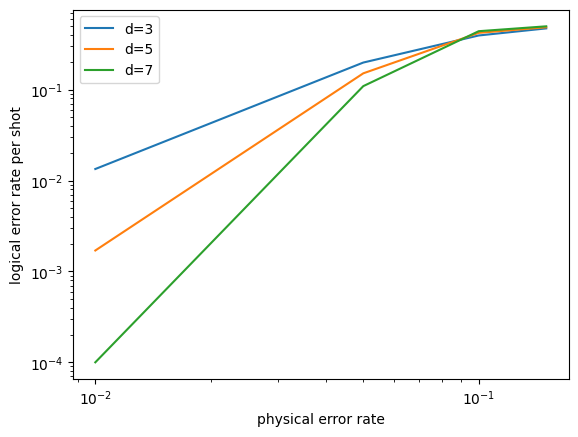

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
num_shots = 10_000
for d in [3, 5, 7]:
    xs = []
    ys = []
    for p in [0.01, 0.05, 0.1, 0.15]:
        
        rep = RepetitionCode(
            distance = d,
            depolarize1_rate = p,
            depolarize2_rate = p
        )
        rep.build_memory_circuit(number_of_rounds=d*3)
        num_errors_sampled = rep.compute_logical_errors(num_shots)
        xs.append(p)
        ys.append(num_errors_sampled / num_shots)
    ax.plot(xs, ys, label="d=" + str(d))
ax.loglog()
ax.set_xlabel("physical error rate")
ax.set_ylabel("logical error rate per shot")
ax.legend()
fig.show()